Let's have a look at the US used manual transmission car market around July 2019. We will address the questions:

(I) Which cities have the most manual cars?

(II) What are the top six best used manual car models in terms of value, and what are the top six cheapest models?

Since mileage affects price, by best we mean the most valuable independent of their mileage, and by cheapest, we mean least valuable independet of mileage. The analysis will take into account not only these factors, but also the prevalence of the 
relavant models. I.e. there has to be enough of them to qualify to be in our list. 




PART 0: Getting the Data
    
To answer (I)-(IV) a popular used car sales website was scraped using the beautifulsoup parser and made into a pandas dataframe. The code for this is available in a separate notebook.

PART 1: Data Cleaning

In [1]:
import pandas as pd

#convert the csv file into a pandas frame

#note that these cars are used

df=pd.read_csv('true_car_manual_transmission_07_2_2019', thousands=',', encoding='utf-8' )

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11102 entries, 0 to 11101
Data columns (total 6 columns):
Model       11102 non-null object
Year        11102 non-null int64
Price       11102 non-null object
Location    11102 non-null object
Mileage     11102 non-null object
Color       11100 non-null object
dtypes: int64(1), object(5)
memory usage: 520.5+ KB


,Model,Year,Price,Location,Mileage,Color
0,Jeep Renegade Latitude 4WD,2015,"$13,200","Kokomo, IN","52,004 miles",Glacier Metallic
1,Mitsubishi Eclipse GS Coupe Manual,2008,"$2,600","Tampa, FL","139,436 miles",Orange
2,Chevrolet Spark LS Manual,2019,"$8,995","Knoxville, TN","6,076 miles",Passion Fruit
3,FIAT 500 Pop Hatch,2017,"$10,497","Spokane Valley, WA","11,567 miles",Rosso (Red)
4,Chevrolet Spark LS Manual,2018,"$7,821","Matteson, IL","8,500 miles",Mosaic Black


In [2]:

#get rid of the dollar sign in Price

df.Price = pd.DataFrame({'Price': [x.strip('$') for x in df.Price]})

df.Price

df.head()






,Model,Year,Price,Location,Mileage,Color
0,Jeep Renegade Latitude 4WD,2015,"13,200","Kokomo, IN","52,004 miles",Glacier Metallic
1,Mitsubishi Eclipse GS Coupe Manual,2008,"2,600","Tampa, FL","139,436 miles",Orange
2,Chevrolet Spark LS Manual,2019,"8,995","Knoxville, TN","6,076 miles",Passion Fruit
3,FIAT 500 Pop Hatch,2017,"10,497","Spokane Valley, WA","11,567 miles",Rosso (Red)
4,Chevrolet Spark LS Manual,2018,"7,821","Matteson, IL","8,500 miles",Mosaic Black


In [3]:
#Check for and display duplicates

df[df.duplicated()]




,Model,Year,Price,Location,Mileage,Color
4272,Jeep Renegade Latitude 4WD,2015,"13,200","Kokomo, IN","52,004 miles",Glacier Metallic
5573,Mitsubishi Eclipse GS Coupe Manual,2008,"2,600","Tampa, FL","139,436 miles",Orange
7569,Kia Rio LX Sedan Manual,2017,"11,995","Puyallup, WA","17,948 miles",Bright Silver
9992,Honda Civic EX Sedan Automatic,1998,"6,751","Gresham, OR","71,573 miles",Cypress Green Pearl
9993,Ford Fiesta SE Hatch,2018,"12,853","Lynnwood, WA","31,294 miles",White
9994,Hyundai Veloster Base with Red Interior Manual,2012,"9,000","Martinez, GA","90,141 miles",Boston Red
9995,Nissan Versa S Plus CVT,2018,"12,740","Newport, NH","42,500 miles",Brilliant Silver
9996,Chevrolet Camaro LT with 2LT Coupe,2016,"24,497","Fort Worth, TX","8,771 miles",Mosaic Black Metallic
9997,Subaru WRX STI Manual,2017,"21,599","Woods Cross, UT","46,664 miles",Pure Red
9998,Dodge Dart SE,2013,"7,595","Covington, PA","86,223 miles",Redline 2-Coat Pearl


In [4]:
#Remove duplicates

df = df.drop_duplicates()

In [5]:
#Get rid of digit comma in Price


df.Price = df.Price.str.replace(',','')



In [6]:
#convert price to int

df.Price = df.Price.astype(int)

In [7]:
#Clean up Mileage....

df.Mileage = df.Mileage.str.replace('miles','')

In [8]:
df.Mileage = df.Mileage.str.replace(',','')

In [9]:
df.Mileage = df.Mileage.astype(int)

In [10]:
#Explore the data

import seaborn as sns

sns.pairplot(df)

In [11]:
df.describe()

#So it looks like our segment of the market ranges in price from 1744 to 28599 USD


,Year,Price,Mileage
count,9989.000000,9989.000000,9989.000000
mean,2014.207228,12093.809190,52554.175193
std,3.612279,5049.228374,35997.689745
min,1997.000000,1744.000000,5.000000
25%,2013.000000,8409.000000,24836.000000
50%,2015.000000,11577.000000,44501.000000
75%,2017.000000,14999.000000,76051.000000
max,2019.000000,28599.000000,218411.000000


In [12]:
df.corr()

#No suprise that there is a strong negative correlation between Price and Milage, and a positive one between Price and Year

,Year,Price,Mileage
Year,1.000000,0.657034,-0.720132
Price,0.657034,1.000000,-0.708627
Mileage,-0.720132,-0.708627,1.000000


In [13]:
#Let's define an age variable relative to the year 2019, which is when this data was scraped

Age = 2019-df.Year



In [14]:
df['Age'] = Age

In [15]:
#Now drop the Year column as it's correlated with age

df = df.drop('Year', axis=1)

df.head()

,Model,Price,Location,Mileage,Color,Age
0,Jeep Renegade Latitude 4WD,13200,"Kokomo, IN",52004,Glacier Metallic,4
1,Mitsubishi Eclipse GS Coupe Manual,2600,"Tampa, FL",139436,Orange,11
2,Chevrolet Spark LS Manual,8995,"Knoxville, TN",6076,Passion Fruit,0
3,FIAT 500 Pop Hatch,10497,"Spokane Valley, WA",11567,Rosso (Red),2
4,Chevrolet Spark LS Manual,7821,"Matteson, IL",8500,Mosaic Black,1


In [16]:
#check for null values

df.isnull().sum()

#We will drop color completely later on

Model       0
Price       0
Location    0
Mileage     0
Color       2
Age         0
dtype: int64

In [17]:
#Check for leaked automatic transmissions

df[df.Model.str.contains('Automatic')]


,Model,Price,Location,Mileage,Color,Age
157,Hyundai Accent SE Automatic,11995,"El Paso, TX",3729,Urban Gray,0
387,Hyundai Accent SE Sedan Automatic,8495,"Clinton Township, MI",41295,Century White,2
438,Kia Rio LX Sedan Automatic,8810,"Addison, TX",31610,Urban Blue Pearl Metallic,3
484,Chevrolet Sonic LS Sedan Automatic,10500,"Charlotte, NC",21563,Summit White,2
585,Kia Rio LX Sedan Automatic,11269,"Fairfield, OH",24023,Silky Silver,1
696,Kia Forte LX Sedan Automatic,11700,"Bellflower, CA",15000,Silky Silver,2
713,Hyundai Accent SE Automatic,14996,"Oregon City, OR",3285,Frost White Pearl,0
726,Hyundai Elantra SE 2.0L Sedan Automatic (Ulsa...,11997,"Sacramento, CA",12803,Molten Silver,2
747,Kia Rio S Sedan Automatic,12472,"Manahawkin, NJ",15960,Clear White,1
800,Hyundai Accent SE Sedan Automatic,10777,"Madison, WI",48036,Ironman Silver,2


In [18]:
#Remove leaked Automatics

df = df[~df.Model.str.contains('Automatic')]

PART 2: Which Cities Have the Most (Used) Manual Cars

In [19]:
df_location_counts = df.Location.value_counts()

df_location_counts.head()

#Looks like the top three cities are Orlando, Houston, and Raleigh. 



 Orlando, FL        159
 Houston, TX        135
 Raleigh, NC        107
 Tampa, FL          103
 San Antonio, TX     97
Name: Location, dtype: int64

In [20]:
df_location_counts_atleast60 = df_location_counts[df_location_counts>= 60]

#Let's look cities having at least sixty cars

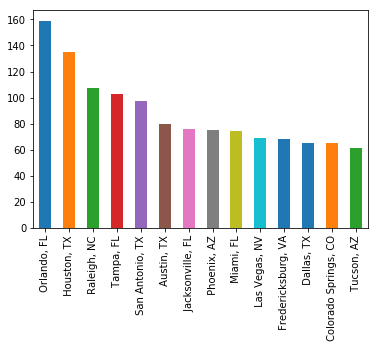

In [21]:
df_location_counts_atleast60.plot(kind='bar')

In [22]:
df_location_counts_atleast60.sum()

#What fraction of the total number of cars do these fourteen cities account for?

df_location_counts_atleast60.sum()/len(df.index)

#about 12.5%

0.12540650406504064

PART 3: Which cars are the top best? Which are the top cheapest? 

In [23]:
#To address the question we want to find which cars are the most (also least) valuable independent of mileage. To do this, 
#we can run a linear regression with price as the target, and mileage, age, and models the predictors. 
#Hence we convert the car models into one-hot encoded dummy variables. 

df_Model = pd.get_dummies(df.Model)



In [24]:
df_Model_concat = pd.concat([df, df_Model], axis=1)

In [25]:
df_final_by_Model = df_Model_concat.drop(['Location', 'Color', 'Model'], axis=1)

df_final_by_Model

df_final_by_Model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 0 to 9991
Columns: 1229 entries, Price to Subaru WRX Base Manual 
dtypes: int32(2), int64(1), uint8(1226)
memory usage: 11.7 MB


In [26]:
#Separate the target from the rest and make some useful imports

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler



Y = df_final_by_Model.Price

X = df_final_by_Model.drop('Price', axis=1)




In [27]:
X.head(2)

,Mileage,Age,Acura ILX 2.4L Manual with Premium Package,Acura RSX Manual,Acura TL Manual,Acura TLX V6 SH-AWD with Technology Package,Acura TSX Sedan I4 Manual,Acura TSX Sedan I4 Manual with Technology Package,Audi A3 Hatchback 2.0T FrontTrak Manual,Audi A3 Hatchback FrontTrak Manual,...,Volvo S40 2.5L Turbo FWD,Volvo S40 2.5L Turbo Manual AWD,Volvo S60 2.4L FWD,Volvo XC60 2015.5 T5 Drive-E FWD,smart fortwo Passion Cabriolet,smart fortwo Passion Coupe,smart fortwo Prime Coupe,smart fortwo Proxy Coupe,smart fortwo Pure Coupe,Subaru WRX Base Manual
0,52004,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,139436,11,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
Y.head(2)

0    13200
1     2600
Name: Price, dtype: int32

In [29]:
X[['Mileage', 'Age']]





,Mileage,Age
0,52004,4
1,139436,11
2,6076,0
3,11567,2
4,8500,1
5,6296,1
6,2921,2
7,4416,2
8,13155,3
9,4031,3


In [30]:
from sklearn.preprocessing import StandardScaler

In [39]:
#Let's use a pipeline to combine standardizing our data with lasso regression and cross validation

from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split



In [32]:
steps = [('scaler', StandardScaler()), ('Lasso', Lasso())]

from sklearn.pipeline import Pipeline

pipeline = Pipeline(steps) # define the pipeline object.

#Could have used make_pipeline instead of pipeline to avoid naming the estimator/transformer

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=30)

In [41]:
#Define parameter grid to be used for gridsearchCV

parameters = {'Lasso__alpha':np.linspace(1,20,10)}

In [42]:
#Instantiate gridsearchCV with the pipeline, parameters above and five fold cv

from sklearn.model_selection import GridSearchCV


grid = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [43]:
grid.fit(X_train, Y_train)




C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConv

C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarn

C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConv

C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning:

C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarn

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'Lasso__alpha': array([ 1.     ,  3.11111,  5.22222,  7.33333,  9.44444, 11.55556,
       13.66667, 15.77778, 17.88889, 20.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print(grid.score(X_test,Y_test)) 



0.9125756341780075


C:\Users\macguyver011\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype uint8, int32, int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [49]:
print(grid.best_params_)

{'Lasso__alpha': 7.333333333333334}


In [58]:
from sklearn.metrics import r2_score

In [59]:
#Now let's standardize manually

X_s = 1/X.std()*(X-X.mean())


In [61]:
lasso_s = Lasso(alpha=7.33)
lasso_s.fit(X_s,Y)


Y_pred_s = lasso_s.predict(X_s)

In [62]:
print(r2_score(Y,Y_pred_s))

0.9449799013469673


In [63]:
coef_s_dict = {}
for coef, feat in zip(lasso_s.coef_, X_s.columns):
    coef_s_dict[feat] = coef
    
coefficients_s = pd.Series(coef_s_dict)

In [66]:
coefficient_s_nonzero = coefficients_s[coefficients_s != 0]

In [67]:
coefficient_s_nonzero.sort_values(ascending=False)

 Subaru WRX Base Manual                         538.927284
 Subaru WRX Premium Manual                      521.558811
 Honda Civic Si Sedan Manual                    501.243517
 Ford Mustang EcoBoost Fastback                 486.285773
 Subaru WRX Manual                              412.656684
 Chevrolet Camaro LT with 1LT Coupe             368.641747
 Ford Mustang EcoBoost Premium Fastback         368.014950
 MINI Countryman Cooper FWD                     360.743457
 Jeep Wrangler Sport                            335.740418
 Honda Civic Si Coupe Manual                    333.519494
 Chevrolet Camaro LT with 2LT Coupe             321.391770
 Ford Mustang EcoBoost Premium Convertible      280.695802
 Subaru Impreza WRX Base Sedan                  280.453300
 Subaru WRX Limited Manual                      267.684612
 Ford Mustang V6 Fastback                       242.408843
 Ford Mustang GT Coupe                          236.028963
 Honda Accord Sport 2.0T Manual                 225.1628

In [136]:
#twenty most valuable

twenty_most_value = list(coefficient_s_nonzero.sort_values(ascending=False).index)[0:20]

In [137]:
#twenty least valuable

twenty_least_value = list(coefficient_s_nonzero.sort_values(ascending=True).index)[2:22]

In [147]:
twenty_most_value

[' Subaru WRX Base Manual ',
 ' Subaru WRX Premium Manual ',
 ' Honda Civic Si Sedan Manual ',
 ' Ford Mustang EcoBoost Fastback ',
 ' Subaru WRX Manual ',
 ' Chevrolet Camaro LT with 1LT Coupe ',
 ' Ford Mustang EcoBoost Premium Fastback ',
 ' MINI Countryman Cooper FWD ',
 ' Jeep Wrangler Sport ',
 ' Honda Civic Si Coupe Manual ',
 ' Chevrolet Camaro LT with 2LT Coupe ',
 ' Ford Mustang EcoBoost Premium Convertible ',
 ' Subaru Impreza WRX Base Sedan ',
 ' Subaru WRX Limited Manual ',
 ' Ford Mustang V6 Fastback ',
 ' Ford Mustang GT Coupe ',
 ' Honda Accord Sport 2.0T Manual ',
 ' Ford Focus ST Hatchback ',
 ' MINI Cooper Convertible ',
 ' Subaru BRZ Limited Manual ']

In [112]:
#Let's see what the mean price of cars is 

df.Price.mean()

12102.759146341463

In [69]:
corr=X.corr()

In [86]:
corr.head()

,Mileage,Age,Acura ILX 2.4L Manual with Premium Package,Acura RSX Manual,Acura TL Manual,Acura TLX V6 SH-AWD with Technology Package,Acura TSX Sedan I4 Manual,Acura TSX Sedan I4 Manual with Technology Package,Audi A3 Hatchback 2.0T FrontTrak Manual,Audi A3 Hatchback FrontTrak Manual,...,Volvo S40 2.5L Turbo FWD,Volvo S40 2.5L Turbo Manual AWD,Volvo S60 2.4L FWD,Volvo XC60 2015.5 T5 Drive-E FWD,smart fortwo Passion Cabriolet,smart fortwo Passion Coupe,smart fortwo Prime Coupe,smart fortwo Proxy Coupe,smart fortwo Pure Coupe,Subaru WRX Base Manual
Mileage,1.000000,0.719458,0.015676,0.017798,0.021143,-0.006038,0.004890,0.023738,0.029094,0.023459,...,0.028930,0.012706,0.033107,0.014024,0.014096,-0.034421,-0.005473,-0.013808,-0.011704,-0.012173
Age,0.719458,1.000000,0.004244,0.022951,0.022951,-0.007800,0.008973,0.011768,0.034913,0.030071,...,0.008973,0.022951,0.031337,-0.002209,0.033326,-0.011407,-0.007078,-0.009055,0.009428,-0.010596
Acura ILX 2.4L Manual with Premium Package,0.015676,0.004244,1.000000,-0.000176,-0.000176,-0.000176,-0.000176,-0.000176,-0.000305,-0.000305,...,-0.000176,-0.000176,-0.000176,-0.000176,-0.000352,-0.000864,-0.000249,-0.000249,-0.000431,-0.000176
Acura RSX Manual,0.017798,0.022951,-0.000176,1.000000,-0.000102,-0.000102,-0.000102,-0.000102,-0.000176,-0.000176,...,-0.000102,-0.000102,-0.000102,-0.000102,-0.000203,-0.000498,-0.000144,-0.000144,-0.000249,-0.000102
Acura TL Manual,0.021143,0.022951,-0.000176,-0.000102,1.000000,-0.000102,-0.000102,-0.000102,-0.000176,-0.000176,...,-0.000102,-0.000102,-0.000102,-0.000102,-0.000203,-0.000498,-0.000144,-0.000144,-0.000249,-0.000102


In [76]:
print(corr.Mileage[2:].max())

print(corr.Age[2:].max())



#This shows that there is no car model which is correlated highly with mileage or age which means the regression coefficients
#give insight into feature importance

0.10218118698184286
0.1019302820050992


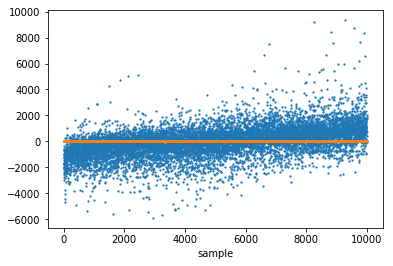

In [77]:
#Plot the residuals and the line y=0 as comparison



import matplotlib.pyplot as plt

Z=np.zeros(len(Y.index))

plt.xlabel('sample')
plt.scatter(Y.index, Y-Y_pred_s, s=1.5)
plt.scatter(Y.index, Z, s=1.5)
plt.show()

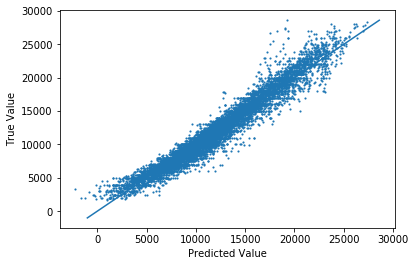

In [78]:
#True vs Pred

D=np.linspace(-1000.0,Y.max(), num=1000)

#np.linspace(2.0, 3.0, num=5)

#means 2 to 3 for a total of 5 points

plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.scatter(Y_pred_s, Y, s=1.25)
plt.plot(D,D)
plt.show()

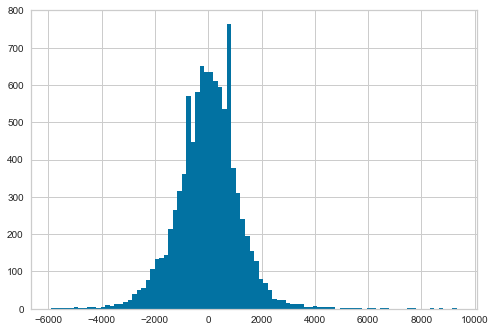

In [83]:
#Residual histogram; looks fairly normal

plt.hist(Y-Y_pred_s, bins=90, range=None)

plt.show()

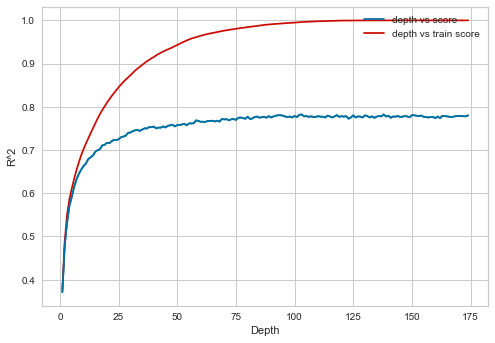

	 The optimal depth is 103.


In [82]:
#Try a non-parametric model: decision tree regression

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,175)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    
    regr.fit(X_train, Y_train)
    train_errors.append(regr.score(X_train,Y_train))
    scores.append(regr.score(X_test,Y_test))

fig = plt.figure() 
ax1 = fig.add_subplot(111)

ax1.plot(depths, scores, c='b', label='depth vs score')
ax1.plot(depths, train_errors, c='r', label='depth vs train score')
plt.legend(loc='upper right');

plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores


plt.show()

n_opt=depths[np.argmax(scores)]

print('\t The optimal depth is {}.'.format(n_opt))


In [84]:
#Take the depth to be 103

regr = DecisionTreeRegressor(max_depth=103)
    
regr.fit(X, Y)
    

DecisionTreeRegressor(criterion='mse', max_depth=103, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [85]:
tree = {}
for coef, feat in zip(regr.feature_importances_, X.columns):
    tree[feat] = coef
    
tree = pd.Series(tree)

In [86]:
tree[tree!=0].sort_values(ascending=False)


Mileage                                              5.321666e-01
Age                                                  8.633984e-02
 Subaru WRX Premium Manual                           1.417563e-02
 Honda Civic Si Sedan Manual                         1.416133e-02
 Subaru WRX Base Manual                              1.365587e-02
 Ford Mustang EcoBoost Fastback                      1.342581e-02
 Nissan Versa 1.6 S Manual                           1.173833e-02
 Subaru WRX Manual                                   1.028206e-02
 Nissan Versa S Sedan Manual                         9.266401e-03
 Honda Civic Si Coupe Manual                         8.304236e-03
 Ford Fiesta SE Sedan                                6.976643e-03
 Chevrolet Camaro LT with 1LT Coupe                  6.761605e-03
 Ford Mustang EcoBoost Premium Fastback              6.410254e-03
 Ford Focus SE Sedan                                 6.224832e-03
 Kia Soul Base Manual                                5.903852e-03
 Jeep Wran

In [139]:
#So the top twenty are:

top_twenty_tree = list(tree[tree!=0].sort_values(ascending=False).index)[2:22]

In [89]:
#Now lets compare these with the simplest algorithm which means looking at the modes, i.e. most
#frequently occuring models 

In [87]:
count=df.Model.value_counts()

In [88]:
count

 Ford Focus SE Sedan                                           542
 Kia Soul Base Manual                                          306
 Ford Fiesta SE Sedan                                          186
 Honda Civic Si Sedan Manual                                   165
 Ford Focus SE Hatchback                                       162
 Nissan Versa 1.6 S Manual                                     151
 MINI Cooper S Hardtop 2-Door                                  140
 Ford Focus ST Hatchback                                       135
 Ford Mustang EcoBoost Fastback                                129
 Honda Civic Si Coupe Manual                                   121
 MINI Cooper Hardtop 2-Door                                    120
 Kia Forte LX Sedan Manual                                     116
 Ford Fiesta SE Hatch                                          105
 Jeep Patriot Sport FWD                                        100
 Chevrolet Camaro LT with 1LT Coupe                           

In [140]:
#So the top twenty modes are:

top_twenty_modes = list(count[0:20].index)

In [141]:
top_twenty_cars =\
pd.DataFrame({'modes':top_twenty_modes, 'most price determining': top_twenty_tree, 'most valuable': twenty_most_value,\
              'least valuable': twenty_least_value })

In [142]:
top_twenty_cars.head(31)

,modes,most price determining,most valuable,least valuable
0,Ford Focus SE Sedan,Subaru WRX Premium Manual,Subaru WRX Base Manual,Ford Focus SE Sedan
1,Kia Soul Base Manual,Honda Civic Si Sedan Manual,Subaru WRX Premium Manual,Nissan Versa 1.6 S Manual
2,Ford Fiesta SE Sedan,Subaru WRX Base Manual,Honda Civic Si Sedan Manual,Ford Fiesta SE Sedan
3,Honda Civic Si Sedan Manual,Ford Mustang EcoBoost Fastback,Ford Mustang EcoBoost Fastback,Kia Soul Base Manual
4,Ford Focus SE Hatchback,Nissan Versa 1.6 S Manual,Subaru WRX Manual,Kia Forte LX Sedan Manual
5,Nissan Versa 1.6 S Manual,Subaru WRX Manual,Chevrolet Camaro LT with 1LT Coupe,Ford Fiesta SE Hatch
6,MINI Cooper S Hardtop 2-Door,Nissan Versa S Sedan Manual,Ford Mustang EcoBoost Premium Fastback,FIAT 500 Pop Hatch
7,Ford Focus ST Hatchback,Honda Civic Si Coupe Manual,MINI Countryman Cooper FWD,Nissan Versa S Manual
8,Ford Mustang EcoBoost Fastback,Ford Fiesta SE Sedan,Jeep Wrangler Sport,Mitsubishi Mirage G4 ES Sedan Manual
9,Honda Civic Si Coupe Manual,Chevrolet Camaro LT with 1LT Coupe,Honda Civic Si Coupe Manual,Chevrolet Spark LS MT


In [164]:
#From this we can get the 'best' and 'worst' manual cars the following way: For the best ones
#just take the intersection (overlap) of the modes column with the most valuable column, and similarly for the
#cheapest ones.

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

best_cars = intersection(twenty_most_value, top_twenty_modes)

cheapest_cars = intersection(twenty_least_value, top_twenty_modes)


In [148]:
print(len(best_cars))

print(len(cheapest_cars))

6
10


In [174]:
top_best_and_cheapest_cars = pd.DataFrame({'best':pd.Series(best_cars), 'cheapest':pd.Series(cheapest_cars)})


In [175]:
top_best_and_cheapest_cars.head(10)

,best,cheapest
0,Subaru WRX Base Manual,Ford Focus SE Sedan
1,Honda Civic Si Sedan Manual,Nissan Versa 1.6 S Manual
2,Ford Mustang EcoBoost Fastback,Ford Fiesta SE Sedan
3,Chevrolet Camaro LT with 1LT Coupe,Kia Soul Base Manual
4,Honda Civic Si Coupe Manual,Kia Forte LX Sedan Manual
5,Ford Focus ST Hatchback,Ford Fiesta SE Hatch
6,NaN,Ford Fiesta SE Hatchback
7,NaN,Ford Focus S Sedan
8,NaN,Ford Focus SE Hatchback
9,NaN,Volkswagen Jetta 1.4T S Manual


In [176]:
#Note: Ford Focus Hatchback appears on both columns, in the left column it appears as 'ST', and in the right as
#'SE'. Let's have a look at the median price of the ST and compare with the SE.

print(df[df.Model == ' Ford Focus ST Hatchback '].Price.median())

print(df[df.Model == ' Ford Focus SE Hatchback '].Price.median())



16777.0
9999.5


In [ ]:
#The difference is what is under the hood. The ST has way more horsepower, so this is no suprise.

In [179]:
#Finally, to answer question (I) here are the top six

top_six = top_best_and_cheapest_cars.dropna()

top_six.head(6)

,best,cheapest
0,Subaru WRX Base Manual,Ford Focus SE Sedan
1,Honda Civic Si Sedan Manual,Nissan Versa 1.6 S Manual
2,Ford Mustang EcoBoost Fastback,Ford Fiesta SE Sedan
3,Chevrolet Camaro LT with 1LT Coupe,Kia Soul Base Manual
4,Honda Civic Si Coupe Manual,Kia Forte LX Sedan Manual
5,Ford Focus ST Hatchback,Ford Fiesta SE Hatch
